In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [2]:
path = 'Monkeypox Skin Image Dataset'

In [5]:
names = []
nums = []
data = {'Name of class': [], 'Number of samples': []}

for i in os.listdir(path):
    full_path = os.path.join(path, i)  # Use os.path.join to create the correct path
    if os.path.isdir(full_path):  # Check if it's a directory
        nums.append(len(os.listdir(full_path)))
        names.append(i)

data['Name of class'] += names
data['Number of samples'] += nums

df = pd.DataFrame(data)
print(df)

  Name of class  Number of samples
0    Chickenpox                107
1       Measles                 91
2     Monkeypox                279
3        Normal                293


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Name of class', ylabel='Number of samples'>

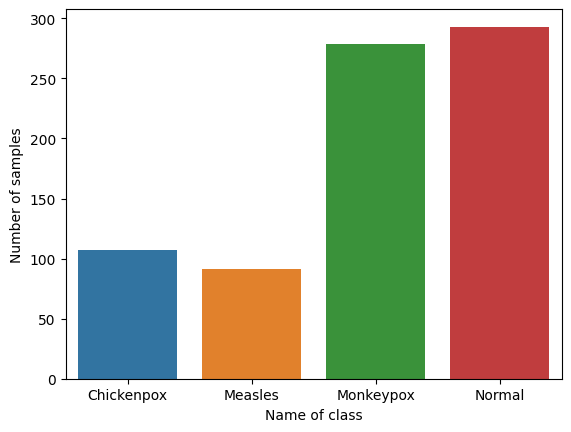

In [6]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

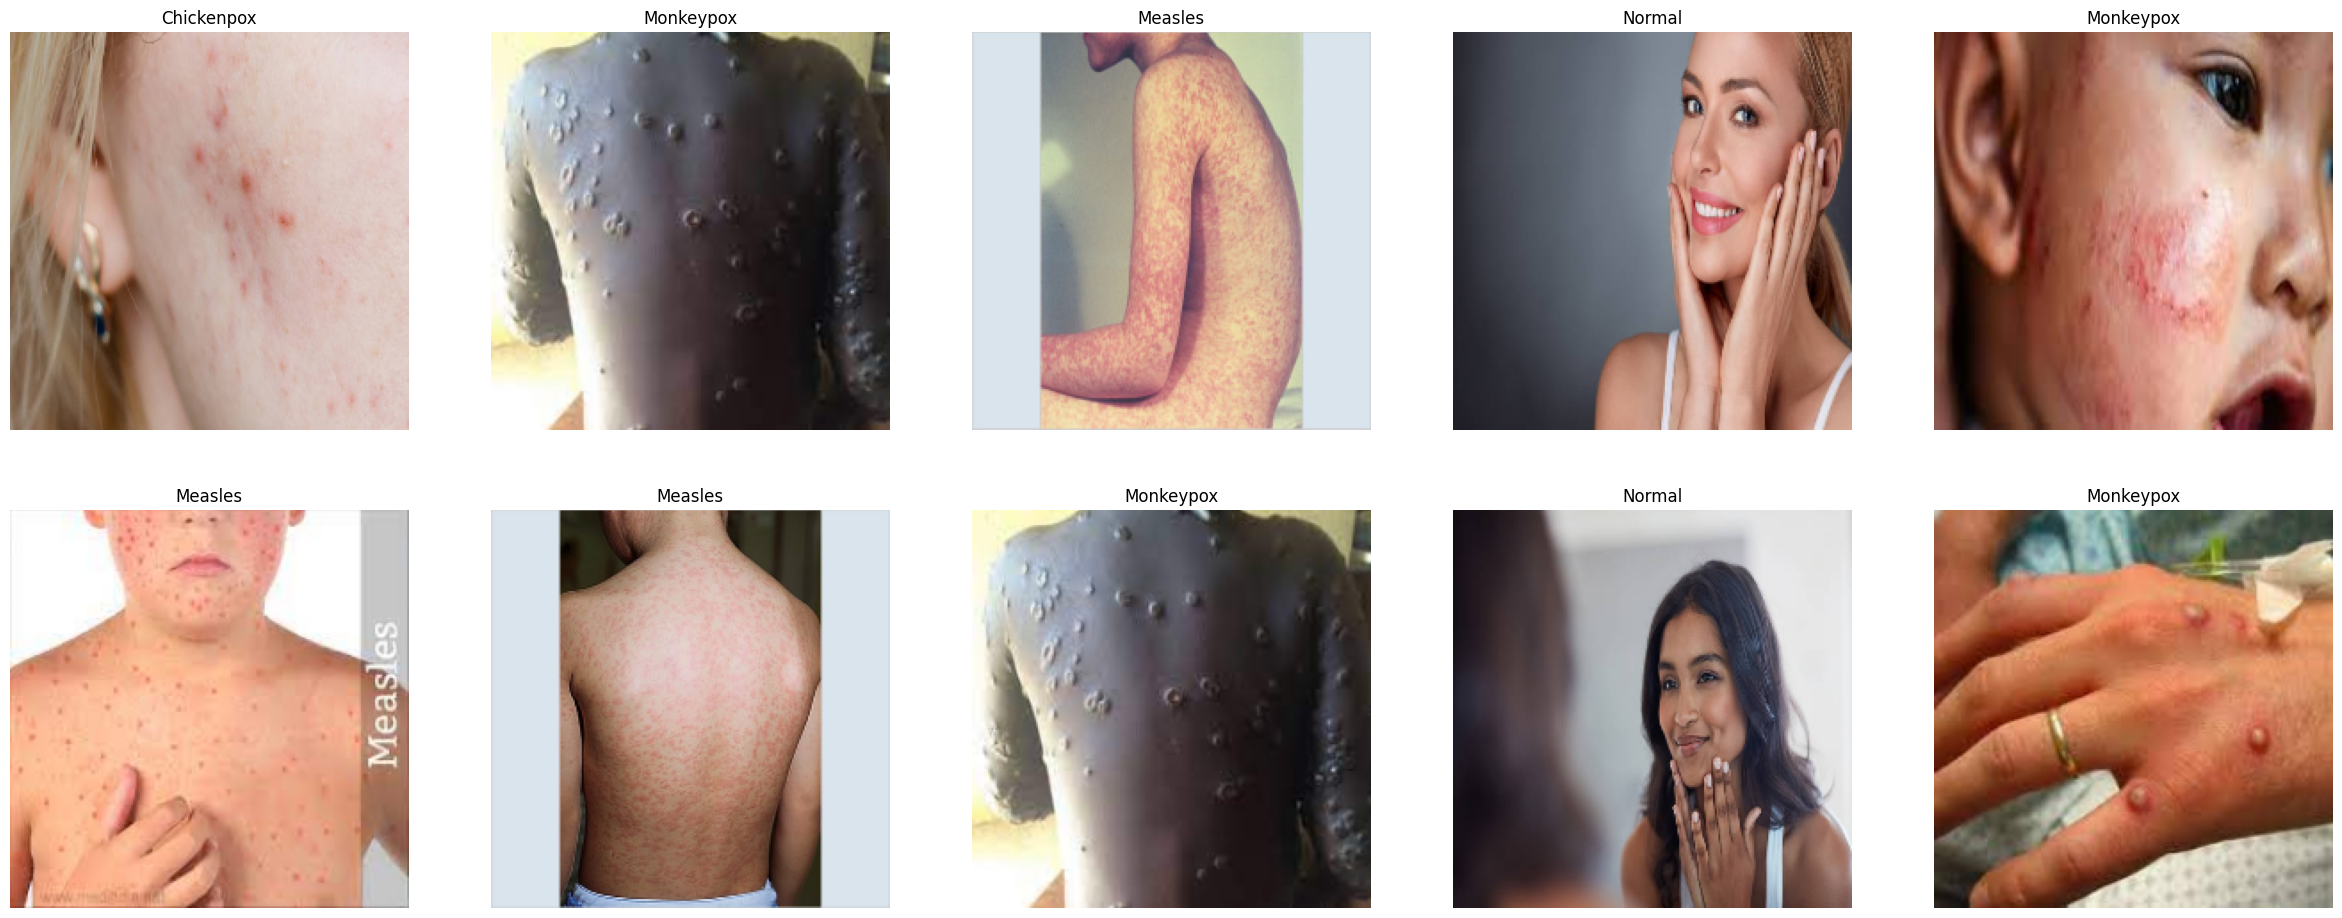

In [11]:
classes = os.listdir(path)

plt.figure(figsize=(30, 30))
for x in range(10):
    i = random.randint(0, len(classes) - 1)  # Randomly select a class
    class_name = classes[i]

    # List all images in the selected class
    class_images = os.listdir(os.path.join(path, class_name))

    j = random.randint(0, len(class_images) - 1)  # Randomly select an image from the class
    image_path = os.path.join(path, class_name, class_images[j])

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [12]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [14]:
train_ds = image_datagen.flow_from_directory(
        path,
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path,
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 618 images belonging to 4 classes.
Found 152 images belonging to 4 classes.


In [15]:

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

17225924/17225924 [==============================] - 55s 3us/step


In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                 2

In [17]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
20/20 [==============================] - 92s 4s/step - loss: 1.2163 - accuracy: 0.5113 - val_loss: 1.0272 - val_accuracy: 0.5461
Epoch 2/10
20/20 [==============================] - 77s 4s/step - loss: 0.7592 - accuracy: 0.7217 - val_loss: 1.1026 - val_accuracy: 0.5921
Epoch 3/10
20/20 [==============================] - 78s 4s/step - loss: 0.5940 - accuracy: 0.7896 - val_loss: 1.0413 - val_accuracy: 0.6382
Epoch 4/10
20/20 [==============================] - 78s 4s/step - loss: 0.4975 - accuracy: 0.8366 - val_loss: 0.9424 - val_accuracy: 0.6579
Epoch 5/10
20/20 [==============================] - 77s 4s/step - loss: 0.4039 - accuracy: 0.8722 - val_loss: 0.8557 - val_accuracy: 0.7171
Epoch 6/10
20/20 [==============================] - 77s 4s/step - loss: 0.3537 - accuracy: 0.8803 - val_loss: 0.7056 - val_accuracy: 0.7632
Epoch 7/10
20/20 [==============================] - 77s 4s/step - loss: 0.3376 - accuracy: 0.8916 - val_loss: 0.6837 - val_accuracy: 0.7763
Epoch 8/10
20/20 [==

5/5 [==============================] - 4s 793ms/step - loss: 0.4751 - accuracy: 0.8421


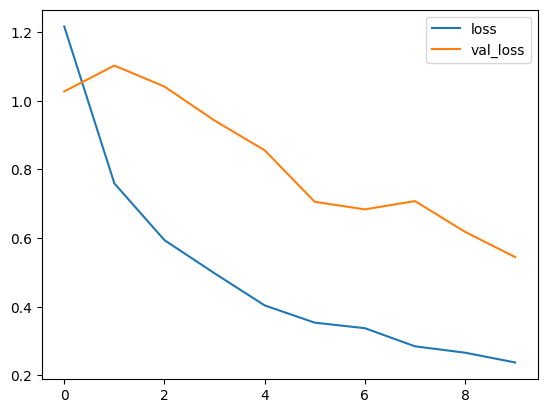

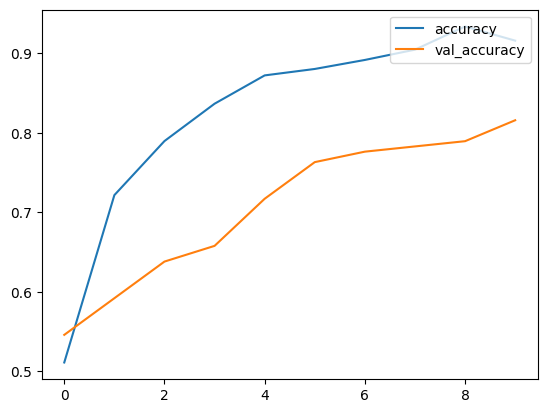

In [18]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

In [24]:
random_image_path = 'test.png'

# Load and preprocess the image for prediction
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
img = cv2.resize(img, (224, 224))  # Adjust the target size as needed
img = img / 255.0  # Normalize the image (assuming your model was trained with normalized data)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions using your model
predictions = model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted class
print(f"Predicted Class Index: {predicted_class}")

# If you have a list of class labels, you can map the index to the class name
class_labels = ["Chickenpox", "Measles", "Monkeypox", "Normal"]  # Replace with your actual class labels
predicted_class_name = class_labels[predicted_class]

print(f"Predicted Class: {predicted_class_name}")

1/1 [==============================] - 0s 73ms/step
Predicted Class Index: 2
Predicted Class: Monkeypox
